In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyarrow.feather as feather

def read_pickle_file(file):
    pickle_data = pd.read_pickle(file)
    return pickle_data

def read_feather_file(file):
    with open('file.feather', 'rb') as f:
        data = feather.read_feather(f)
    return data

In [2]:
cs_vw = read_pickle_file('cs_vw.pkl')
cs_ew = read_pickle_file('cs_ew.pkl')

# Print Returns

## vw

In [3]:
uni_ret = pd.DataFrame()
for c in cs_vw.char_list:
    # expr = "cs_vw.port_%s.uni_ret.to_csv('./data_Jan2021/chars60/sorted_portfolio_vw/unisort/unisort_vw_%s.csv')"%(c,c)
    expr = "tmp=cs_vw.port_%s.uni_ret.copy()"%(c)
    exec(expr)
    tmp.columns = [c+i for i in tmp.columns]
    tmp.index=pd.to_datetime(tmp.index)
    uni_ret=uni_ret.append(tmp.T)
    del tmp
    
uni_ret.T.to_csv('./data/sorted_portfolio_vw/unisort_returns.csv')

In [4]:
uni_sr = [] 
uni_ls_ret = pd.DataFrame()
for c in cs_vw.char_list:
    # expr = "cs_vw.port_%s.uni_ret.to_csv('./data_Jan2021/chars60/sorted_portfolio_vw/unisort/unisort_vw_%s.csv')"%(c,c)
    expr = "tmp=cs_vw.port_%s.uni_ls.copy()"%(c)
    exec(expr)
    tmp.index=pd.to_datetime(tmp.index)
    expr = "uni_ls_ret['%s']=tmp"%(c)
    exec(expr)
    expr = "uni_sr.append(cs_vw.port_%s.uni_ls_sr)"%(c)
    exec(expr)
    del tmp

uni_sr = pd.Series(uni_sr, index=cs_vw.char_list)
uni_ls_ret.to_csv('./data/sorted_portfolio_vw/unifactor_returns.csv')

In [6]:
bi_sr = [] 
bi_ret = pd.DataFrame()
for c in cs_vw.char_list[1:]:
    expr = "tmp=cs_vw.port_%s.bi_ret.copy()"%(c)
    exec(expr)
    tmp.index=pd.to_datetime(tmp.index)
    bi_ret=bi_ret.append(tmp.T)
    expr = "bi_sr.append(cs_vw.port_%s.bi_ls_sr)"%(c)
    exec(expr)
    del tmp
    
bi_ret.T.to_csv('./data/sorted_portfolio_vw/bisort_returns.csv')

# EW

In [7]:
uni_ret = pd.DataFrame()
for c in cs_ew.char_list:
    # expr = "cs_ew.port_%s.uni_ret.to_csv('./data_Jan2021/chars60/sorted_portfolio_ew/unisort/unisort_ew_%s.csv')"%(c,c)
    expr = "tmp=cs_ew.port_%s.uni_ret.copy()"%(c)
    exec(expr)
    tmp.columns = [c+i for i in tmp.columns]
    tmp.index=pd.to_datetime(tmp.index)
    uni_ret=uni_ret.append(tmp.T)
    del tmp
    
uni_ret.T.to_csv('./data/sorted_portfolio_ew/unisort_returns.csv')

In [8]:
uni_sr = [] 
uni_ls_ret = pd.DataFrame()
for c in cs_ew.char_list:
    # expr = "cs_ew.port_%s.uni_ret.to_csv('./data_Jan2021/chars60/sorted_portfolio_ew/unisort/unisort_ew_%s.csv')"%(c,c)
    expr = "tmp=cs_ew.port_%s.uni_ls.copy()"%(c)
    exec(expr)
    tmp.index=pd.to_datetime(tmp.index)
    expr = "uni_ls_ret['%s']=tmp"%(c)
    exec(expr)
    expr = "uni_sr.append(cs_ew.port_%s.uni_ls_sr)"%(c)
    exec(expr)
    del tmp

uni_sr = pd.Series(uni_sr, index=cs_ew.char_list)
uni_ls_ret.to_csv('./data/sorted_portfolio_ew/unifactor_returns.csv')

In [9]:
bi_sr = [] 
bi_ret = pd.DataFrame()
for c in cs_ew.char_list[1:]:
    expr = "tmp=cs_ew.port_%s.bi_ret.copy()"%(c)
    exec(expr)
    tmp.index=pd.to_datetime(tmp.index)
    bi_ret=bi_ret.append(tmp.T)
    expr = "bi_sr.append(cs_ew.port_%s.bi_ls_sr)"%(c)
    exec(expr)
    del tmp
    
bi_ret.T.to_csv('./data/sorted_portfolio_ew/bisort_returns.csv')

# Find Returns

In [10]:
cs_vw.port_bm.uni_ret

port_uni_bm,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
1972-01-31,0.041301,0.016307,0.017469,0.019853,0.018479,0.004106,0.015160,0.027072,0.070191,0.083016
1972-02-29,0.051440,0.057416,0.025786,0.035208,0.010807,0.013044,0.013020,0.000866,0.006678,0.032164
1972-03-31,0.022093,0.018684,0.022114,0.027392,-0.012949,-0.013038,-0.014831,-0.023443,-0.001399,0.006415
1972-04-30,0.012434,0.022724,-0.008565,0.008271,-0.003931,-0.000718,0.002590,-0.003198,0.002685,-0.004165
1972-05-31,0.046380,0.024833,0.004928,-0.017760,-0.003622,0.017347,-0.005857,0.008474,-0.000515,-0.028542
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.124711,0.050069,0.068250,0.031710,0.054585,0.056136,0.022877,0.022283,0.037041,0.076823
2020-09-30,-0.050433,-0.031588,-0.017397,-0.021465,-0.012986,-0.017418,-0.035737,-0.048222,-0.064330,-0.074854
2020-10-31,-0.045820,-0.018274,-0.010506,-0.010476,-0.025326,-0.003819,0.015977,0.008262,0.002418,0.007640


<AxesSubplot:xlabel='date'>

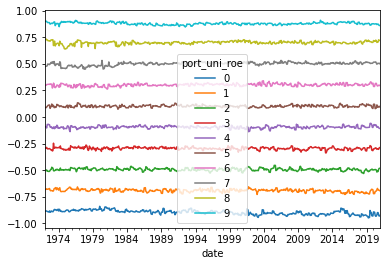

In [11]:
cs_vw.port_roe.uni_roe.plot()

<AxesSubplot:xlabel='date'>

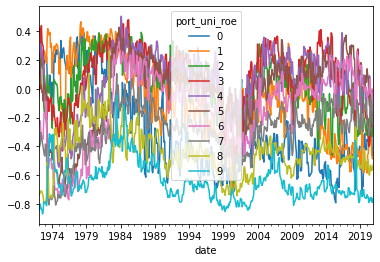

In [12]:
cs_vw.port_roe.uni_bm.plot()

<AxesSubplot:xlabel='date'>

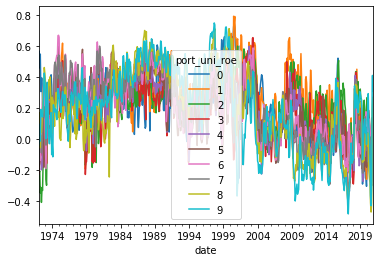

In [13]:
cs_vw.port_roe.uni_beta.plot()

<AxesSubplot:xlabel='date'>

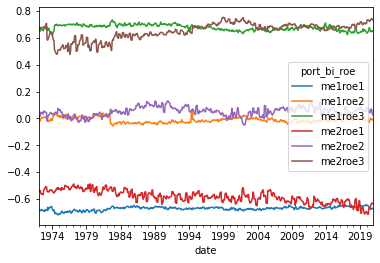

In [14]:
cs_vw.port_roe.bi_roe.plot()

<AxesSubplot:xlabel='date'>

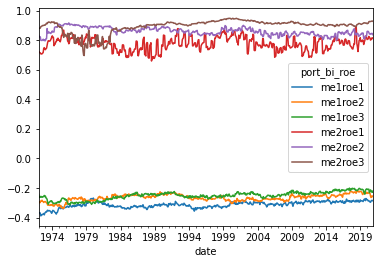

In [15]:
cs_vw.port_roe.bi_me.plot()

In [16]:
cs_ew.port_roe.

SyntaxError: invalid syntax (<ipython-input-16-375cb164f357>, line 1)